In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
fund_df=pd.read_csv('fundamentals.csv')
price_df=pd.read_csv('prices.csv')

fund_df.shape
price_df.shape



(851264, 7)

In [ ]:
fund_df.drop(columns=['Unnamed: 0'],inplace=True,errors='ignore')
price_df.drop(columns=['Unnamed: 0'],inplace=True,errors='ignore')

In [ ]:
price_df.dropna(subset=['date'],inplace=True)
fund_df.dropna(subset=['Period Ending'],inplace=True)




In [ ]:
price_df = price_df[price_df['symbol'] == 'AAPL']
fund_df = fund_df[fund_df['Ticker Symbol'] == 'AAPL']


In [ ]:
fund_df.replace([np.inf, -np.inf], np.nan, inplace=True)
price_df.replace([np.inf, -np.inf], np.nan, inplace=True)

fund_df.fillna(fund_df.median(numeric_only=True))
price_df.fillna(fund_df.median(numeric_only=True))

,date,symbol,open,close,low,high,volume
254,2010-01-04,AAPL,213.429998,214.009998,212.380001,214.499996,123432400.0
721,2010-01-05,AAPL,214.599998,214.379993,213.249994,215.589994,150476200.0
1189,2010-01-06,AAPL,214.379993,210.969995,210.750004,215.230000,138040000.0
1657,2010-01-07,AAPL,211.750000,210.580000,209.050005,212.000006,119282800.0
2125,2010-01-08,AAPL,210.299994,211.980005,209.060005,212.000006,111902700.0
...,...,...,...,...,...,...,...
848767,2016-12-23,AAPL,115.589996,116.519997,115.589996,116.519997,14249500.0
849267,2016-12-27,AAPL,116.519997,117.260002,116.489998,117.800003,18296900.0
849767,2016-12-28,AAPL,117.519997,116.760002,116.199997,118.019997,20905900.0
850267,2016-12-29,AAPL,116.449997,116.730003,116.400002,117.110001,15039500.0


In [ ]:
fund_df['Period Ending'].dtype
price_df['date'].dtype


dtype('O')

In [ ]:
fund_df['Period Ending'] = pd.to_datetime(fund_df['Period Ending'],format='mixed',errors='coerce')
price_df['date'] = pd.to_datetime(price_df['date'],format='mixed',errors='coerce')

In [ ]:
fund_df['year']=fund_df['Period Ending'].dt.year
price_df['year']=price_df['date'].dt.year

In [ ]:
merged_df = pd.merge(
    price_df,
    fund_df,
    left_on=['symbol','year'],
    right_on=['Ticker Symbol','year'],
    how='inner'
)
print(merged_df.shape)
merged_df.head()

(1008, 86)


,date,symbol,open,close,low,high,volume,year,Ticker Symbol,Period Ending,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,2013-01-02,AAPL,553.819992,549.029976,541.630020,554.999992,140129500.0,2013,AAPL,2013-09-28,...,7.328600e+10,4.365800e+10,1.235490e+11,8.345100e+10,2.070000e+11,1.709100e+11,0.0,2013.0,40.03,9.252311e+08
1,2013-01-03,AAPL,547.879990,542.099991,540.999992,549.669991,88241300.0,2013,AAPL,2013-09-28,...,7.328600e+10,4.365800e+10,1.235490e+11,8.345100e+10,2.070000e+11,1.709100e+11,0.0,2013.0,40.03,9.252311e+08
2,2013-01-04,AAPL,536.969994,526.999992,525.829979,538.630005,148583400.0,2013,AAPL,2013-09-28,...,7.328600e+10,4.365800e+10,1.235490e+11,8.345100e+10,2.070000e+11,1.709100e+11,0.0,2013.0,40.03,9.252311e+08
3,2013-01-07,AAPL,521.999985,523.900002,515.199989,529.300018,121039100.0,2013,AAPL,2013-09-28,...,7.328600e+10,4.365800e+10,1.235490e+11,8.345100e+10,2.070000e+11,1.709100e+11,0.0,2013.0,40.03,9.252311e+08
4,2013-01-08,AAPL,529.209976,525.310020,521.250008,531.889984,114676800.0,2013,AAPL,2013-09-28,...,7.328600e+10,4.365800e+10,1.235490e+11,8.345100e+10,2.070000e+11,1.709100e+11,0.0,2013.0,40.03,9.252311e+08


In [ ]:

features =[
        'open',
        'high',
        'low',
        'volume',
]
X=merged_df[features].copy()
y = merged_df['close']

X=X.fillna(X.mean())


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)
model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))
print("Accuracy (R2 %):", r2_score(y_test, y_pred) * 100)

MAE: 1.40297965153462
MSE: 6.092343642635056
R2 Score: 0.9998360066453656
Accuracy (R2 %): 99.98360066453657


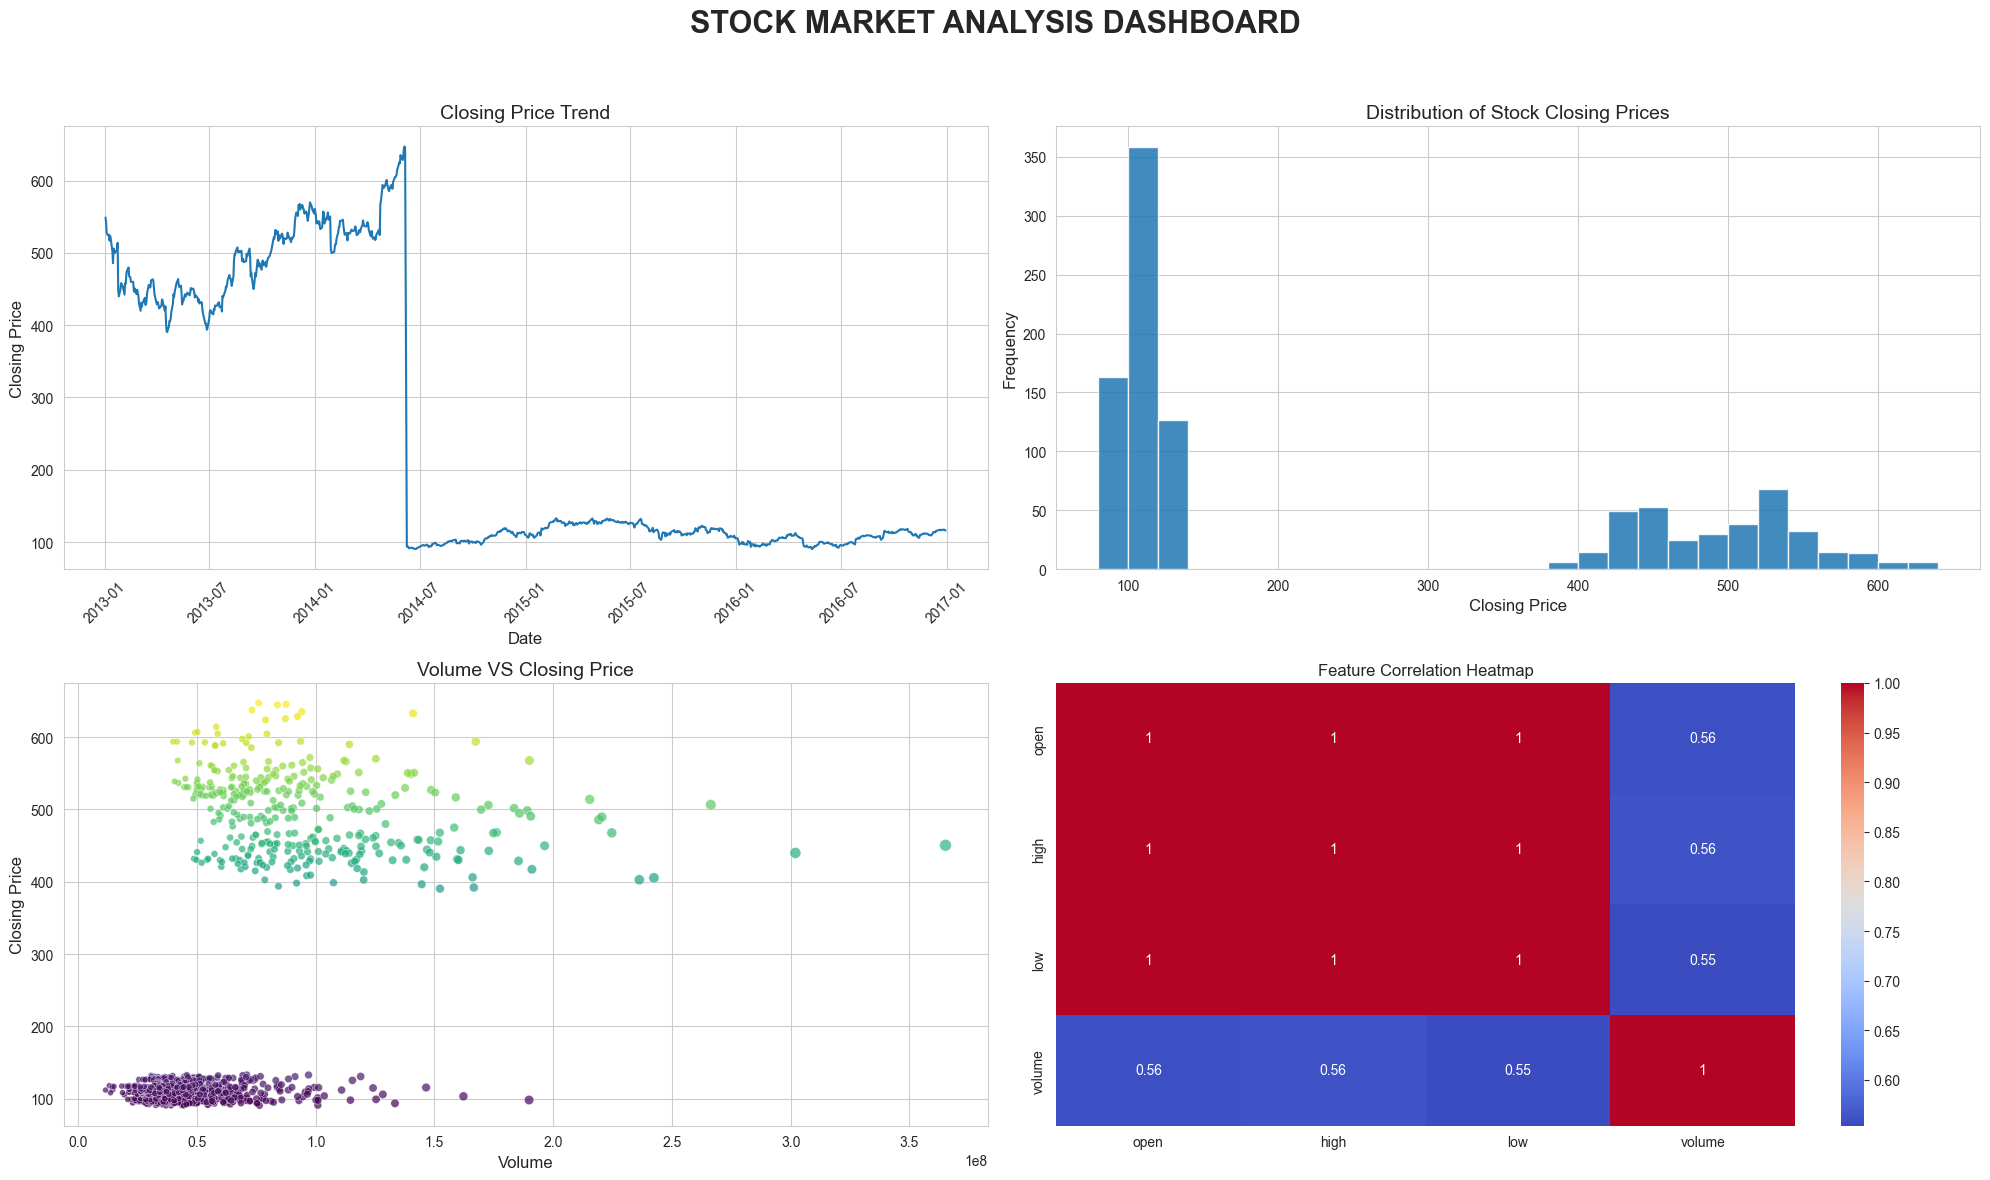

In [ ]:

sns.set_style("whitegrid")

fig=plt.figure(figsize=(20,12))
fig.suptitle("STOCK MARKET ANALYSIS DASHBOARD",fontsize=22,fontweight="bold")

# PRICE TREND
ax1=plt.subplot(2,2,1)
ax1.plot(merged_df["date"],merged_df["close"])
ax1.set_title("Closing Price Trend",fontsize=14)
ax1.set_xlabel("Date",fontsize=12)
ax1.set_ylabel("Closing Price",fontsize=12)
ax1.tick_params(axis='x',rotation=45)


# Price Distribution
ax2 = plt.subplot(2,2,2)
bins = np.arange(80, 660, 20)
ax2.hist(merged_df['close'], bins=bins, alpha=0.85)
ax2.set_title("Distribution of Stock Closing Prices",fontsize=14)
ax2.set_xlabel("Closing Price", fontsize=12)
ax2.set_ylabel("Frequency", fontsize=12)

# Volume VS Price

ax3 = plt.subplot(2,2,3)
sns.scatterplot(
    x="volume", 
    y="close", 
    size="volume",           
    hue="close",             
    palette="viridis", 
    alpha=0.7, 
    data=merged_df,
    ax=ax3
)
ax3.set_title("Volume VS Closing Price",fontsize=14)
ax3.set_xlabel("Volume",fontsize=12)
ax3.set_ylabel("Closing Price",fontsize=12)
ax3.legend([],[], frameon=False)

# Correlation Heatmap

ax4=plt.subplot(2,2,4)
corr=merged_df[["open","high","low","volume"]].corr()
sns.heatmap(corr,annot=True,cmap="coolwarm",ax=ax4)
ax4.set_title("Feature Correlation Heatmap")
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()